In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

In [4]:
df1 = pd.read_csv("/content/SalaryData_Test(1).csv")

In [5]:
df2 = pd.read_csv('/content/SalaryData_Train(1).csv')

In [6]:
df1.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [7]:
df2.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [8]:
print(df1.shape)
print(df2.shape)

(15060, 14)
(27961, 14)


In [9]:
merged_df = pd.concat([df1, df2], axis=0)
merged_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [10]:
data = merged_df

In [11]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [12]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [36]:
data = data.dropna()

In [37]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [38]:
data.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000,43020.000000
mean,38.551185,2.205137,10.312738,10.115481,2.586309,5.964551,1.413529,3.680753,0.674640,1109.580916,88.003952,40.925477,35.431892,0.247141
std,13.231342,0.958817,3.816761,2.552211,1.501702,4.029001,1.596689,0.831758,0.468515,7556.362815,403.867982,11.997496,5.933450,0.431354
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43020 entries, 0 to 27959
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            43020 non-null  int64  
 1   workclass      43020 non-null  int64  
 2   education      43020 non-null  int64  
 3   educationno    43020 non-null  int64  
 4   maritalstatus  43020 non-null  int64  
 5   occupation     43020 non-null  int64  
 6   relationship   43020 non-null  int64  
 7   race           43020 non-null  int64  
 8   sex            43020 non-null  int64  
 9   capitalgain    43020 non-null  float64
 10  capitalloss    43020 non-null  float64
 11  hoursperweek   43020 non-null  float64
 12  native         43020 non-null  int64  
 13  Salary         43020 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 4.9 MB


In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in data.select_dtypes(include='object'):
  data[column] = le.fit_transform(data[column])

data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,11,9,2,4,0,4,1,0.0,0.0,50.0,37,0
2,28,1,7,12,2,10,0,4,1,0.0,0.0,40.0,37,1
3,44,2,15,10,2,6,0,2,1,7688.0,0.0,40.0,37,1
4,34,2,0,6,4,7,1,4,1,0.0,0.0,30.0,37,0


In [41]:
data.shape

(43020, 14)

In [42]:
data.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.085140,-0.004611,0.037270,-0.270818,-0.002853,-0.246533,0.021570,0.082406,0.080000,0.058032,0.101901,-0.004291,0.236100
workclass,0.085140,1.000000,0.017500,0.040627,-0.034503,0.018478,-0.065206,0.048483,0.070391,0.035363,0.008656,0.050654,0.003504,0.017479
education,-0.004611,0.017500,1.000000,0.347814,-0.041798,-0.034659,-0.011938,0.010941,-0.028489,0.030182,0.015937,0.059199,0.079149,0.079279
educationno,0.037270,0.040627,0.347814,1.000000,-0.066333,0.089170,-0.088459,0.031581,0.004770,0.127936,0.081996,0.145633,0.094511,0.332712
maritalstatus,-0.270818,-0.034503,-0.041798,-0.066333,1.000000,0.014362,0.178844,-0.071681,-0.121368,-0.042656,-0.033034,-0.183370,-0.021963,-0.192083
occupation,-0.002853,0.018478,-0.034659,0.089170,0.014362,1.000000,-0.054019,0.000154,0.057273,0.021021,0.017127,0.016916,-0.002219,0.051253
relationship,-0.246533,-0.065206,-0.011938,-0.088459,0.178844,-0.054019,1.000000,-0.117231,-0.583190,-0.056760,-0.057060,-0.257798,-0.004933,-0.253086
race,0.021570,0.048483,0.010941,0.031581,-0.071681,0.000154,-0.117231,1.000000,0.088731,0.014578,0.020879,0.043629,0.122401,0.072321
sex,0.082406,0.070391,-0.028489,0.004770,-0.121368,0.057273,-0.583190,0.088731,1.000000,0.046844,0.047578,0.230635,-0.006178,0.215923
capitalgain,0.080000,0.035363,0.030182,0.127936,-0.042656,0.021021,-0.056760,0.014578,0.046844,1.000000,-0.031998,0.085080,0.007031,0.221579


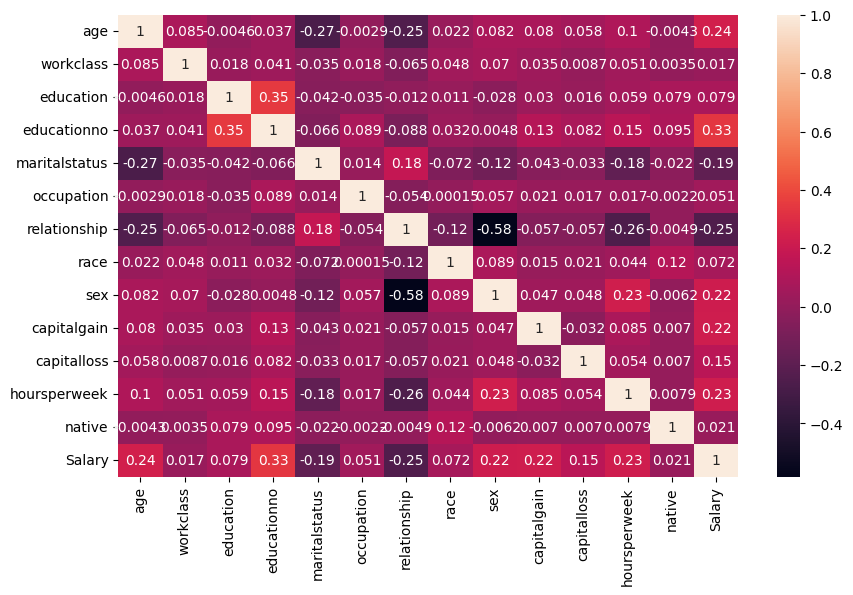

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()


<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


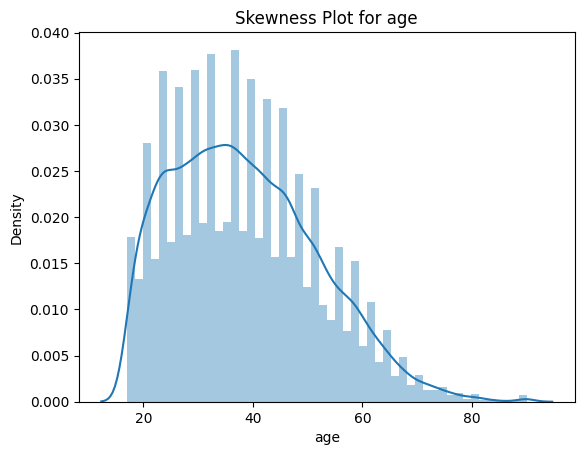

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


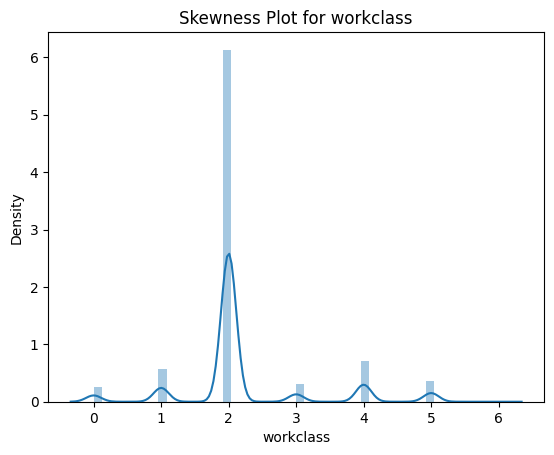

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


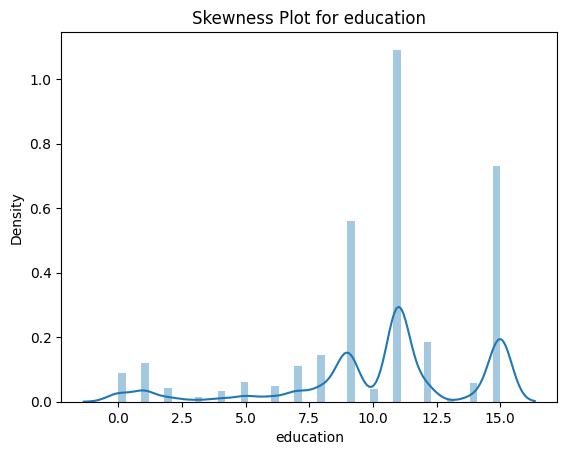

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


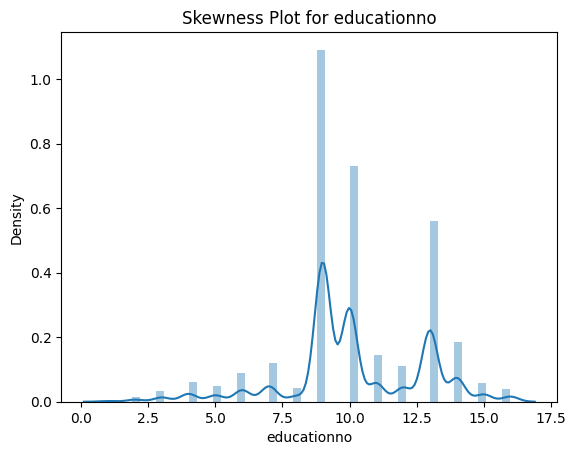

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


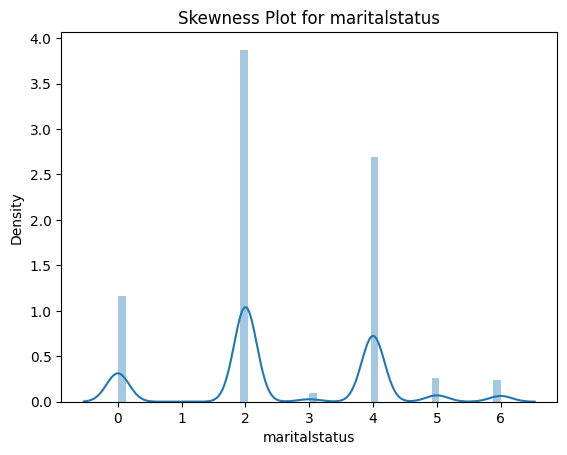

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


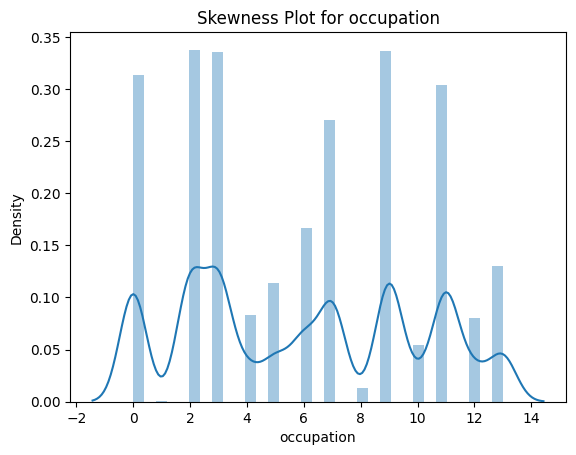

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


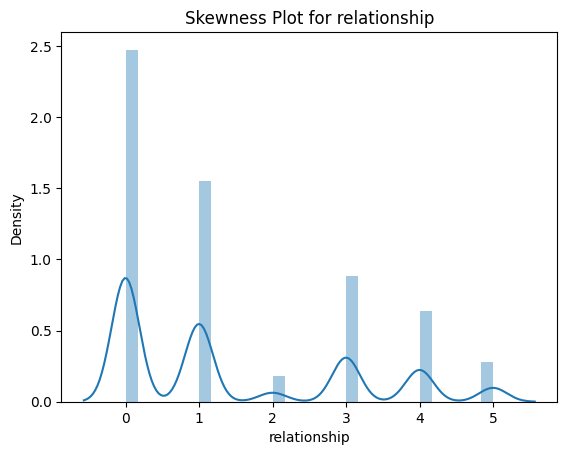

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


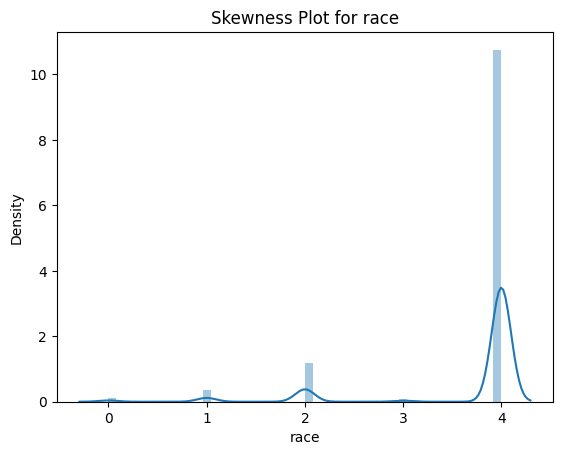

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


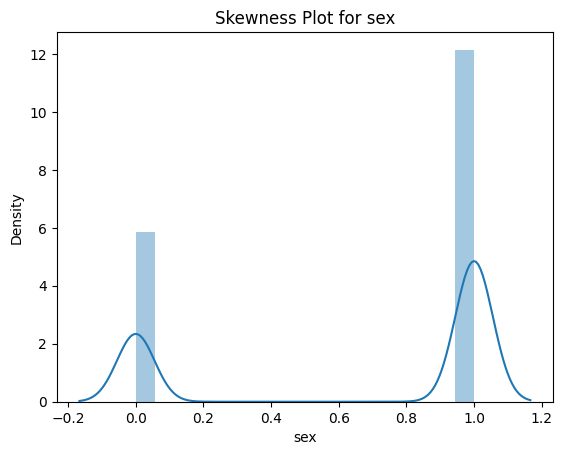

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


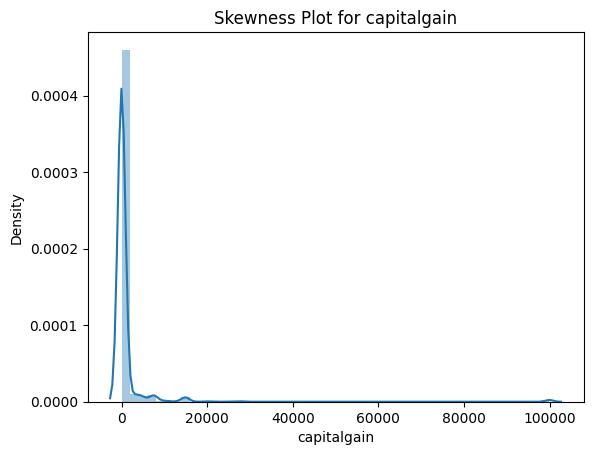

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


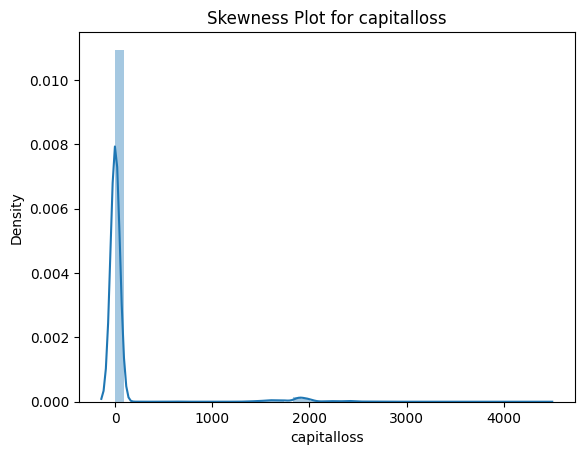

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


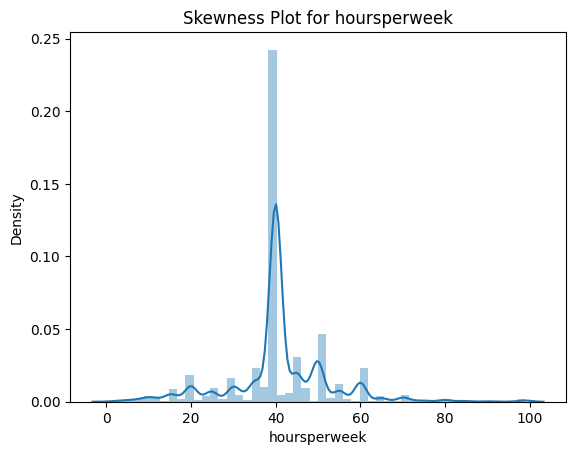

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


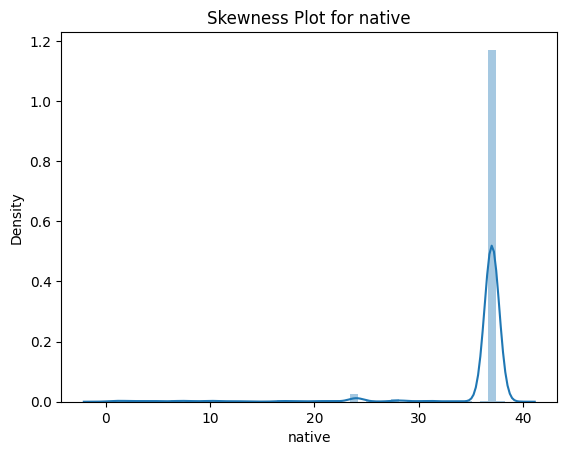

<ipython-input-44-0975d3508114>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


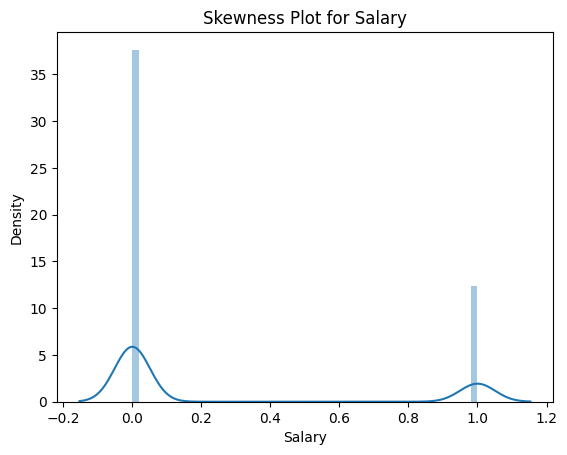

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot the skewness of each numeric column
for col in numeric_columns:
  plt.figure()
  sns.distplot(data[col])
  plt.title('Skewness Plot for ' + col)
  plt.show()

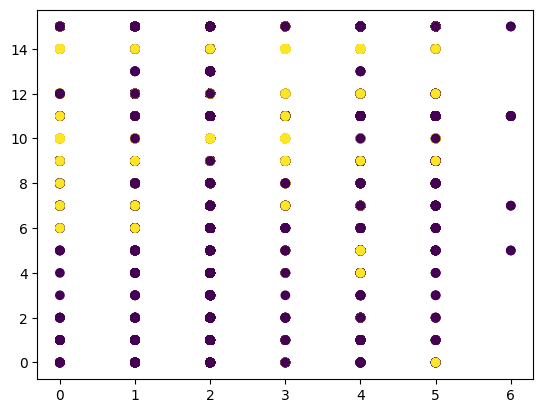

In [45]:
plt.scatter(data['workclass'], data['education'], c=data['Salary'])

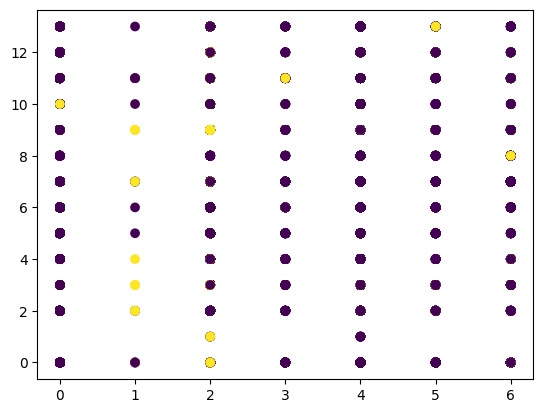

In [46]:
plt.scatter(data['maritalstatus'], data['occupation'], c=data['Salary'])

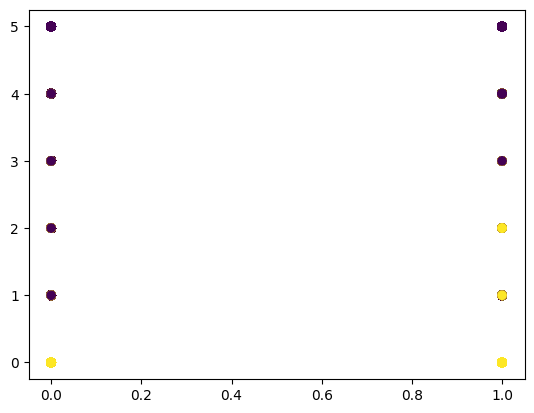

In [47]:
plt.scatter(data['Salary'], data['relationship'], c=data['sex'])

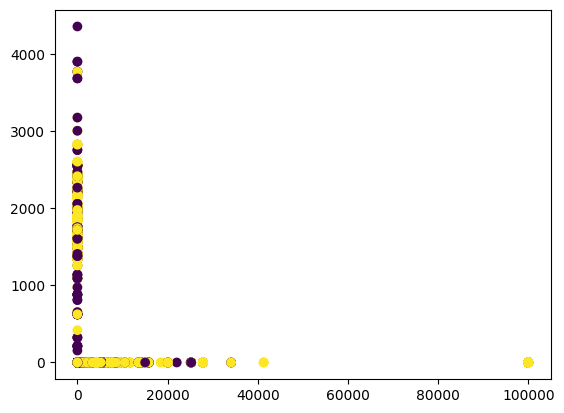

In [48]:
plt.scatter(data['capitalgain'], data['capitalloss'], c=data['sex'])

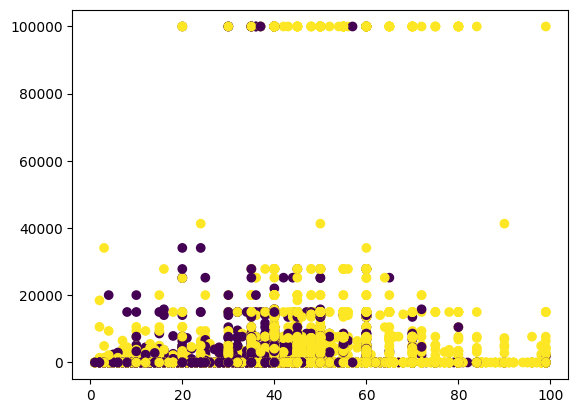

In [49]:
plt.scatter(data['hoursperweek'], data['capitalgain'], c=data['sex'])

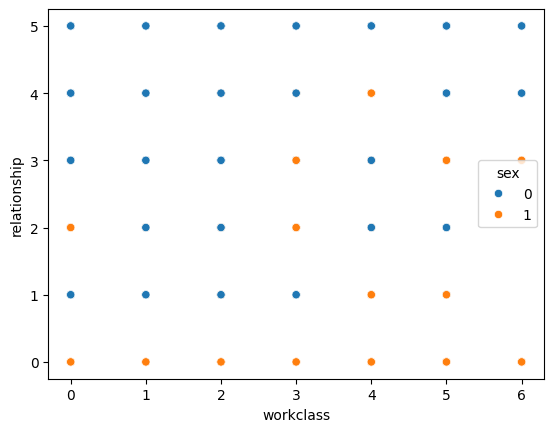

In [50]:
sns.scatterplot(x="workclass", y="relationship", hue="sex", data=data, legend="brief")
plt.show()

In [51]:
data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,11,9,2,4,0,4,1,0.0,0.0,50.0,37,0


In [52]:
for col in data.columns:
  unique_values = data[col].unique()
  print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'age': [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]
Unique values in column 'workclass': [2 1 4 0 5 3 6]
Unique values in column 'education': [ 1 11  7 15  0 14  5  9 12  4  8  6 10  2  3 13]
Unique values in column 'educationno': [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
Unique values in column 'maritalstatus': [4 2 6 5 0 3 1]
Unique values in column 'occupation': [ 6  4 10  7  9  2  0  3 12 11  8 13  5  1]
Unique values in column 'relationship': [3 0 1 4 5 2]
Unique values in column 'race': [2 4 3 0 1]
Unique values in column 'sex': [1 0]
Unique values in column 'capitalgain': [    0.  7688.  3103.  6418.  7298.  3908. 14084.  5178. 15024.  2597.
  2907.  4650.  6497.  5013. 27828.  4934.  4064.  3674.  2174. 10605.
 99999.  1055.   114.  2580.  3411.  4508.  4386.  8614. 1

In [53]:
data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,11,9,2,4,0,4,1,0.0,0.0,50.0,37,0


In [54]:
x = data.iloc[:, :-1]
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0.0,0.0,40.0,37
1,38,2,11,9,2,4,0,4,1,0.0,0.0,50.0,37
2,28,1,7,12,2,10,0,4,1,0.0,0.0,40.0,37
3,44,2,15,10,2,6,0,2,1,7688.0,0.0,40.0,37
4,34,2,0,6,4,7,1,4,1,0.0,0.0,30.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27955,54,5,2,8,4,7,3,4,1,4101.0,0.0,40.0,37
27956,42,2,8,11,0,9,1,4,0,0.0,0.0,40.0,37
27957,33,2,11,9,2,4,0,4,1,0.0,0.0,50.0,37
27958,21,2,11,9,4,9,3,4,0,0.0,0.0,30.0,37


In [55]:
y = data.iloc[:, -1]
y

0        0
1        0
2        1
3        1
4        0
        ..
27955    0
27956    0
27957    0
27958    0
27959    0
Name: Salary, Length: 43020, dtype: int64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3)

In [57]:
clf = SVC(kernel='rbf', gamma=0.0001)  ## kernal we have so many options like 'polynomial,radial basis function, linear'   ## gamma value is randomly selected
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)*100   ## y and y hat
print("Accuracy=:", acc)
confusion_matrix(y_test,y_pred)

Accuracy=: 82.69796993646365


array([[9726,   78],
       [2155,  947]])

## Grid search CV for hyperparameter

In [58]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [59]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC

In [ ]:
clf = SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [50, 5, 10, 0.5, 1, 0.0001], 'C': [1, 15, 14, 13, 12, 11, 10, 0.1]}]
gsv = GridSearchCV(clf,param_grid,cv=kfold)
gsv.fit(x_train,y_train)    ## this code is going into lopp i have this code for aleast 8 hours but its sttill running so i dont now what i have done wrong sir..

In [ ]:
gsv.best_params_ , gsv.best_score_